In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
inventory = pd.read_parquet('C:/Users/neddy/Desktop/스파르타 코딩클럽/최종 프로젝트/데이터셋 및 코딩 파일/inventory_optimized.parquet')
log = pd.read_parquet('C:/Users/neddy/Desktop/스파르타 코딩클럽/최종 프로젝트/데이터셋 및 코딩 파일/real_log_for_spartan_optimized.parquet')
customer_cluster = pd.read_parquet('C:/Users/neddy/Desktop/스파르타 코딩클럽/최종 프로젝트/데이터셋 및 코딩 파일/customer_cluster_info.parquet')

In [3]:
log_full = log.merge(customer_cluster, on = 'CustomerID', how = 'left').merge(inventory[['GoodsCode', 'Category']], on = 'GoodsCode')
log_full

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,cluster_plus,Category
0,74377,view,1484,108330,NaN,NaN,2022-02-17 19:07:19.511967,2,Electronics
1,74377,purchase,1484,108330,NaN,NaN,2022-03-20 04:26:25.511967,2,Electronics
2,132932,view,1484,108330,NaN,NaN,2022-03-08 09:42:09.511967,0,Electronics
3,195629,view,1484,108330,NaN,NaN,2022-10-30 21:50:05.511967,NaN,Electronics
4,206834,view,1484,108330,NaN,NaN,2022-03-09 06:02:25.511967,2,Electronics
...,...,...,...,...,...,...,...,...,...
3096926,516238,view,1338,14250,NaN,NaN,2022-05-05 01:13:44.011487,2,Health & Beauty
3096927,456835,view,1338,14250,NaN,NaN,2022-03-30 23:43:29.249822,4,Health & Beauty
3096928,456835,view,1338,14250,NaN,NaN,2022-03-26 17:27:36.249822,4,Health & Beauty
3096929,456835,view,1338,14250,NaN,NaN,2022-03-31 10:24:56.249822,4,Health & Beauty


In [22]:
log['ActionType'].unique()

['view', 'purchase', 'ad_click', 'basket']
Categories (4, object): ['ad_click', 'basket', 'purchase', 'view']

In [4]:
#인벤토리 original_price랑 로그의 price 다른 것 있는지 확인 : 없음
log_full_temp = log_full.merge(inventory[['GoodsCode', 'OriginalPrice']], on = 'GoodsCode')
log_full_temp = log_full_temp.assign(price_diff = log_full_temp['OriginalPrice'] - log_full_temp['Price'])
log_full_temp['price_diff'].unique()

array([0])

In [10]:
inventory

,GoodsCode,Category,OriginalPrice,Inventory
0,1000,Books,12580,4452
1,1001,Health & Beauty,21530,2308
2,1002,Home & Garden,22800,5177
3,1003,Health & Beauty,22910,9705
4,1004,Health & Beauty,12780,7852
...,...,...,...,...
495,1495,Electronics,137560,4714
496,1496,Home & Garden,10520,1529
497,1497,Electronics,40260,3958
498,1498,Electronics,54950,8904


## 일렉트로닉 카테고리에서 곧바로 가격별 클러스터링

In [5]:
inventory_extracted = inventory[['Category', 'GoodsCode', 'OriginalPrice']]
inventory_electronics = inventory_extracted[inventory_extracted['Category']== 'Electronics'].reset_index()
inventory_electronics = inventory_electronics[['Category', 'GoodsCode', 'OriginalPrice']]
inventory_electronics


,Category,GoodsCode,OriginalPrice
0,Electronics,1018,124990
1,Electronics,1023,95940
2,Electronics,1024,82980
3,Electronics,1033,114120
4,Electronics,1038,40180
...,...,...,...
104,Electronics,1493,54600
105,Electronics,1495,137560
106,Electronics,1497,40260
107,Electronics,1498,54950


In [6]:
def get_percentage_cluster(a):
    if a >= 100000:
        return "upper"
    if a >= 60000:
        return "middle"
    else:
        return "lower"

electronics_segment = inventory_electronics.copy()
electronics_segment = electronics_segment.assign(Segment = electronics_segment['OriginalPrice'].apply(get_percentage_cluster))
electronics_segment = electronics_segment.rename(columns = {'OriginalPrice' : 'Price'})

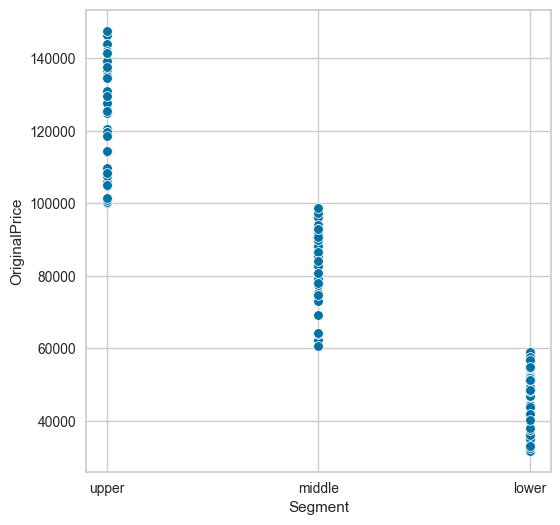

In [19]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = electronics_segment, x= 'Segment', y = 'OriginalPrice')
plt.show()

In [116]:
electronics_segment.groupby('Segment')['GoodsCode'].count()

Segment
lower     36
middle    38
upper     35
Name: GoodsCode, dtype: int64

In [117]:
electronics_segment

,Category,GoodsCode,Price,Segment
0,Electronics,1018,124990,upper
1,Electronics,1023,95940,middle
2,Electronics,1024,82980,middle
3,Electronics,1033,114120,upper
4,Electronics,1038,40180,lower
...,...,...,...,...
104,Electronics,1493,54600,lower
105,Electronics,1495,137560,upper
106,Electronics,1497,40260,lower
107,Electronics,1498,54950,lower


## 고객 클러스터 별 Electronic에서의 제품군 확인
#### 구매한 제품군들과 구매 안한 제품군들 확인

In [39]:
log

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,cluster_plus,Category
0,74377,view,1484,108330,NaN,NaN,2022-02-17 19:07:19.511967,2,Electronics
1,74377,purchase,1484,108330,NaN,NaN,2022-03-20 04:26:25.511967,2,Electronics
2,132932,view,1484,108330,NaN,NaN,2022-03-08 09:42:09.511967,0,Electronics
3,195629,view,1484,108330,NaN,NaN,2022-10-30 21:50:05.511967,NaN,Electronics
4,206834,view,1484,108330,NaN,NaN,2022-03-09 06:02:25.511967,2,Electronics
...,...,...,...,...,...,...,...,...,...
3096926,516238,view,1338,14250,NaN,NaN,2022-05-05 01:13:44.011487,2,Health & Beauty
3096927,456835,view,1338,14250,NaN,NaN,2022-03-30 23:43:29.249822,4,Health & Beauty
3096928,456835,view,1338,14250,NaN,NaN,2022-03-26 17:27:36.249822,4,Health & Beauty
3096929,456835,view,1338,14250,NaN,NaN,2022-03-31 10:24:56.249822,4,Health & Beauty


In [37]:
log_full[(log_full['Category'] == 'Electronics') & (log_full['cluster_plus']=='0') & (log_full['ActionType']=="ad_click")]

,CustomerID,ActionType,GoodsCode,Price,AdID,CPC,Timestamp,cluster_plus,Category
7,270362,ad_click,1484,108330,ad_line,605.63,2022-06-13 01:03:53.511967,0,Electronics
16,28287,ad_click,1484,108330,ad_meta,715.44,2022-04-23 20:22:57.511967,0,Electronics
17,116150,ad_click,1484,108330,ad_google,784.01,2022-04-03 22:54:46.511967,0,Electronics
48,16990,ad_click,1484,108330,ad_line,783.63,2022-06-29 06:47:22.511967,0,Electronics
122,204732,ad_click,1484,108330,ad_meta,746.40,2022-04-07 03:41:21.511967,0,Electronics
...,...,...,...,...,...,...,...,...,...
3078068,412074,ad_click,1358,48200,ad_line,434.39,2022-04-30 14:03:32.157574,0,Electronics
3078074,197724,ad_click,1358,48200,ad_google,391.22,2022-03-23 17:03:14.372990,0,Electronics
3078304,897675,ad_click,1358,48200,ad_google,402.93,2022-05-10 17:24:41.040136,0,Electronics
3078311,292449,ad_click,1358,48200,ad_line,96.96,2022-07-01 03:39:02.201585,0,Electronics


In [7]:
log_electronics = log_full[log_full['Category']=='Electronics']
log_electronics_rearranged = log_electronics[['cluster_plus','GoodsCode', 'ActionType', 'Timestamp', 'Price', 'AdID', 'CustomerID']]
log_electronics_segmented = log_electronics_rearranged.merge(electronics_segment[['GoodsCode', 'Segment']], on = 'GoodsCode')
log_electronics_segmented


,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment
0,2,1484,view,2022-02-17 19:07:19.511967,108330,NaN,74377,upper
1,2,1484,purchase,2022-03-20 04:26:25.511967,108330,NaN,74377,upper
2,0,1484,view,2022-03-08 09:42:09.511967,108330,NaN,132932,upper
3,NaN,1484,view,2022-10-30 21:50:05.511967,108330,NaN,195629,upper
4,2,1484,view,2022-03-09 06:02:25.511967,108330,NaN,206834,upper
...,...,...,...,...,...,...,...,...
673575,2,1358,ad_click,2022-04-27 00:47:23.321879,48200,ad_meta,44131,lower
673576,2,1358,basket,2022-04-14 19:14:18.321879,48200,NaN,44131,lower
673577,2,1358,ad_click,2022-05-21 03:57:24.321879,48200,ad_google,44131,lower
673578,2,1358,basket,2022-04-01 21:58:30.321879,48200,NaN,44131,lower


In [48]:
log_electronics_segmented.query('cluster_plus == "0"').query('ActionType == "ad_click"')

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment
7,0,1484,ad_click,2022-06-13 01:03:53.511967,108330,ad_line,270362,upper
16,0,1484,ad_click,2022-04-23 20:22:57.511967,108330,ad_meta,28287,upper
17,0,1484,ad_click,2022-04-03 22:54:46.511967,108330,ad_google,116150,upper
48,0,1484,ad_click,2022-06-29 06:47:22.511967,108330,ad_line,16990,upper
122,0,1484,ad_click,2022-04-07 03:41:21.511967,108330,ad_meta,204732,upper
...,...,...,...,...,...,...,...,...
673257,0,1358,ad_click,2022-04-30 14:03:32.157574,48200,ad_line,412074,lower
673263,0,1358,ad_click,2022-03-23 17:03:14.372990,48200,ad_google,197724,lower
673493,0,1358,ad_click,2022-05-10 17:24:41.040136,48200,ad_google,897675,lower
673500,0,1358,ad_click,2022-07-01 03:39:02.201585,48200,ad_line,292449,lower


In [8]:
log_electronics_segmented_rearranged = log_electronics_segmented.sort_values(by = ['CustomerID', 'Timestamp'])
electronics_adclick = log_electronics_segmented_rearranged[log_electronics_segmented_rearranged['ActionType'] == 'ad_click'].sort_values(by='Timestamp')
electronics_basket = log_electronics_segmented_rearranged[log_electronics_segmented_rearranged['ActionType']=='basket'].sort_values(by='Timestamp')
electronics_purchase = log_electronics_segmented_rearranged[log_electronics_segmented_rearranged['ActionType']=='purchase'].sort_values(by='Timestamp')



In [53]:
electronics_adclick.query('cluster_plus == "0"')

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment
255447,0,1155,ad_click,2022-02-02 11:42:26.707955,33450,ad_meta,83679,lower
310294,0,1495,ad_click,2022-02-02 20:20:55.486139,137560,ad_meta,688968,upper
663697,0,1302,ad_click,2022-02-02 21:19:32.486139,37600,ad_meta,368141,lower
385102,0,1374,ad_click,2022-02-03 11:53:42.707955,57510,ad_line,272642,lower
69401,0,1219,ad_click,2022-02-04 08:35:06.052427,55120,ad_line,752754,lower
...,...,...,...,...,...,...,...,...
12427,0,1385,ad_click,2022-11-02 03:22:29.511967,78100,ad_line,145502,middle
142552,0,1340,ad_click,2022-11-18 06:38:55.127184,119710,ad_line,573750,upper
543121,0,1426,ad_click,2022-12-25 08:21:52.511967,118500,ad_google,195279,upper
258638,0,1197,ad_click,2023-02-08 20:31:45.511967,34900,ad_line,43189,lower


In [50]:
log_electronics_segmented_rearranged.query('cluster_plus == "0"').query('ActionType == "ad_click"')

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment
130128,0,1265,ad_click,2022-04-14 11:12:17.511967,49280,ad_line,256,lower
12836,0,1385,ad_click,2022-04-06 12:38:26.855443,78100,ad_google,432,middle
647762,0,1498,ad_click,2022-04-17 04:45:14.486848,54950,ad_line,467,lower
334025,0,1224,ad_click,2022-04-11 02:23:23.364258,85500,ad_line,490,middle
500205,0,1497,ad_click,2022-04-15 07:20:00.855443,40260,ad_meta,490,lower
...,...,...,...,...,...,...,...,...
442156,0,1402,ad_click,2022-04-20 00:09:13.906581,80900,ad_line,899744,middle
33650,0,1045,ad_click,2022-05-04 19:25:02.486139,120410,ad_line,899772,upper
82911,0,1486,ad_click,2022-05-12 22:46:13.794648,41930,ad_meta,899919,lower
4466,0,1484,ad_click,2022-03-28 11:20:18.440542,108330,ad_line,899952,upper


# 통합 과정부터 중요

In [45]:
electronic_ad_basket = pd.merge_asof(electronics_adclick, electronics_basket[['CustomerID','GoodsCode', 'Segment', 'Timestamp']], by = 'CustomerID', on = 'Timestamp', tolerance=pd.Timedelta(days=7), direction='forward', suffixes = ('', '_bsk'))
electronic_ad_basket_purchase = pd.merge_asof(electronic_ad_basket, electronics_purchase[['CustomerID','GoodsCode', 'Segment', 'Timestamp']], by = 'CustomerID', on = 'Timestamp', tolerance=pd.Timedelta(days=7), direction='forward', suffixes = ('', '_pchs'))

In [54]:
electronic_ad_basket_purchase.query('cluster_plus == "0"').query('ActionType == "ad_click"')

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment,GoodsCode_bsk,Segment_bsk,GoodsCode_pchs,Segment_pchs
3,0,1155,ad_click,2022-02-02 11:42:26.707955,33450,ad_meta,83679,lower,NaN,NaN,NaN,NaN
4,0,1495,ad_click,2022-02-02 20:20:55.486139,137560,ad_meta,688968,upper,1495.0,upper,NaN,NaN
7,0,1302,ad_click,2022-02-02 21:19:32.486139,37600,ad_meta,368141,lower,NaN,NaN,NaN,NaN
17,0,1374,ad_click,2022-02-03 11:53:42.707955,57510,ad_line,272642,lower,NaN,NaN,NaN,NaN
32,0,1219,ad_click,2022-02-04 08:35:06.052427,55120,ad_line,752754,lower,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
37367,0,1385,ad_click,2022-11-02 03:22:29.511967,78100,ad_line,145502,middle,NaN,NaN,NaN,NaN
37374,0,1340,ad_click,2022-11-18 06:38:55.127184,119710,ad_line,573750,upper,NaN,NaN,NaN,NaN
37397,0,1426,ad_click,2022-12-25 08:21:52.511967,118500,ad_google,195279,upper,NaN,NaN,NaN,NaN
37431,0,1197,ad_click,2023-02-08 20:31:45.511967,34900,ad_line,43189,lower,NaN,NaN,NaN,NaN


In [80]:
log_electronics_segmented_rearranged.query('CustomerID == 32')

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment
79882,2,1336,view,2022-03-10 20:36:37.376860,82700,NaN,32,middle
79883,2,1336,view,2022-03-11 08:25:32.376860,82700,NaN,32,middle
455121,2,1499,ad_click,2022-03-30 16:18:05.376860,33180,ad_google,32,lower
455122,2,1499,purchase,2022-03-31 10:56:52.376860,33180,NaN,32,lower
79881,2,1336,purchase,2022-04-04 20:49:21.376860,82700,NaN,32,middle
455118,2,1499,basket,2022-04-04 21:50:13.376860,33180,NaN,32,lower
300298,2,1124,view,2022-04-21 01:57:06.376860,79780,NaN,32,middle
79880,2,1336,view,2022-04-23 19:00:42.376860,82700,NaN,32,middle
455120,2,1499,basket,2022-04-26 03:22:39.376860,33180,NaN,32,lower
455119,2,1499,view,2022-04-29 09:40:02.376860,33180,NaN,32,lower


In [70]:
import numpy as np

electronic_ad_basket_purchase = electronic_ad_basket_purchase.assign(Final = np.where(
    ~electronic_ad_basket_purchase['Segment_pchs'].isnull(), 'purchase',
    np.where(~electronic_ad_basket_purchase['Segment_bsk'].isnull(), 'basket', 'ad_click')
))

electronic_ad_basket_purchase

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment,GoodsCode_bsk,Segment_bsk,GoodsCode_pchs,Segment_pchs,Final,SameGoods,SameSegment,PurchaseCount,BasketCount,AdclickCount
0,2,1447,ad_click,2022-02-01 19:56:47.008345,101450,ad_google,580664,upper,1447.0,upper,NaN,NaN,basket,O,O,0,1,1
1,4,1250,ad_click,2022-02-02 00:42:48.368317,100420,ad_meta,424087,upper,NaN,NaN,NaN,NaN,ad_click,O,O,0,0,1
2,1,1177,ad_click,2022-02-02 10:42:22.701088,60990,ad_meta,527588,middle,1177.0,middle,1177.0,middle,purchase,O,O,1,1,1
3,0,1155,ad_click,2022-02-02 11:42:26.707955,33450,ad_meta,83679,lower,NaN,NaN,NaN,NaN,ad_click,O,O,0,0,1
4,0,1495,ad_click,2022-02-02 20:20:55.486139,137560,ad_meta,688968,upper,1495.0,upper,NaN,NaN,basket,O,O,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37439,NaN,1150,ad_click,2023-03-11 03:55:29.511967,96230,ad_google,130141,middle,NaN,NaN,NaN,NaN,ad_click,O,O,0,0,1
37440,NaN,1254,ad_click,2023-03-14 23:31:22.127184,64050,ad_meta,198768,middle,NaN,NaN,NaN,NaN,ad_click,O,O,0,0,1
37441,3,1468,ad_click,2023-03-16 08:03:39.511967,74800,ad_line,207425,middle,NaN,NaN,NaN,NaN,ad_click,O,O,0,0,1
37442,3,1202,ad_click,2023-03-18 04:47:18.511967,44480,ad_meta,112763,lower,NaN,NaN,1202.0,lower,purchase,O,O,1,1,1


In [82]:
electronic_ad_basket_purchase.query('cluster_plus == "0"').query( == "basket"').query('SameGoods == "O"')

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment,GoodsCode_bsk,Segment_bsk,GoodsCode_pchs,Segment_pchs,Final,SameGoods,SameSegment,PurchaseCount,BasketCount,AdclickCount
4,0,1495,ad_click,2022-02-02 20:20:55.486139,137560,ad_meta,688968,upper,1495.0,upper,NaN,NaN,basket,O,O,0,1,1
97,0,1302,ad_click,2022-02-06 17:09:40.124007,37600,ad_google,606046,lower,1302.0,lower,NaN,NaN,basket,O,O,0,1,1
117,0,1084,ad_click,2022-02-07 05:48:30.124007,35450,ad_line,645446,lower,1084.0,lower,NaN,NaN,basket,O,O,0,1,1
152,0,1486,ad_click,2022-02-08 00:07:13.899349,41930,ad_google,450708,lower,1486.0,lower,NaN,NaN,basket,O,O,0,1,1
188,0,1477,ad_click,2022-02-08 21:24:22.707955,56640,ad_line,223509,lower,1477.0,lower,NaN,NaN,basket,O,O,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37062,0,1347,ad_click,2022-06-30 17:28:26.855443,104910,ad_line,215852,upper,1347.0,upper,NaN,NaN,basket,O,O,0,1,1
37144,0,1374,ad_click,2022-07-02 18:21:20.935942,57510,ad_meta,879807,lower,1374.0,lower,NaN,NaN,basket,O,O,0,1,1
37215,0,1202,ad_click,2022-07-05 20:36:00.008345,44480,ad_meta,628940,lower,1202.0,lower,NaN,NaN,basket,O,O,0,1,1
37224,0,1310,ad_click,2022-07-06 17:15:11.008345,86590,ad_line,784961,middle,1310.0,middle,NaN,NaN,basket,O,O,0,1,1


In [58]:
electronic_ad_basket_purchase = electronic_ad_basket_purchase.assign(
    SameGoods = np.where(
        electronic_ad_basket_purchase['Final'] == 'purchase', 
        np.where(
            electronic_ad_basket_purchase['GoodsCode_pchs'] == electronic_ad_basket_purchase['GoodsCode'], 
            'O',
            'X'
        ),
        np.where(
            electronic_ad_basket_purchase['Final'] == 'basket',
            np.where(
                electronic_ad_basket_purchase['GoodsCode_bsk'] == electronic_ad_basket_purchase['GoodsCode'], 
                'O',
                'X'
            ),
            'O'
        )
    )
)


electronic_ad_basket_purchase = electronic_ad_basket_purchase.assign(
    SameSegment = np.where(
        electronic_ad_basket_purchase['Final'] == 'purchase', 
        np.where(
            electronic_ad_basket_purchase['Segment_pchs'] == electronic_ad_basket_purchase['Segment'], 
            'O',
            'X'
        ),
        np.where(
            electronic_ad_basket_purchase['Final'] == 'basket',
            np.where(
                electronic_ad_basket_purchase['Segment_bsk'] == electronic_ad_basket_purchase['Segment'], 
                'O',
                'X'
            ),
            'O'
        )
    )
)


electronic_ad_basket_purchase

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment,GoodsCode_bsk,Segment_bsk,GoodsCode_pchs,Segment_pchs,Final,SameGoods,SameSegment
0,2,1447,ad_click,2022-02-01 19:56:47.008345,101450,ad_google,580664,upper,1447.0,upper,NaN,NaN,basket,O,O
1,4,1250,ad_click,2022-02-02 00:42:48.368317,100420,ad_meta,424087,upper,NaN,NaN,NaN,NaN,ad_click,O,O
2,1,1177,ad_click,2022-02-02 10:42:22.701088,60990,ad_meta,527588,middle,1177.0,middle,1177.0,middle,purchase,O,O
3,0,1155,ad_click,2022-02-02 11:42:26.707955,33450,ad_meta,83679,lower,NaN,NaN,NaN,NaN,ad_click,O,O
4,0,1495,ad_click,2022-02-02 20:20:55.486139,137560,ad_meta,688968,upper,1495.0,upper,NaN,NaN,basket,O,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37439,NaN,1150,ad_click,2023-03-11 03:55:29.511967,96230,ad_google,130141,middle,NaN,NaN,NaN,NaN,ad_click,O,O
37440,NaN,1254,ad_click,2023-03-14 23:31:22.127184,64050,ad_meta,198768,middle,NaN,NaN,NaN,NaN,ad_click,O,O
37441,3,1468,ad_click,2023-03-16 08:03:39.511967,74800,ad_line,207425,middle,NaN,NaN,NaN,NaN,ad_click,O,O
37442,3,1202,ad_click,2023-03-18 04:47:18.511967,44480,ad_meta,112763,lower,NaN,NaN,1202.0,lower,purchase,O,O


In [54]:
electronic_ad_basket_purchase.to_parquet('C:/Users/neddy/Desktop/스파르타 코딩클럽/최종 프로젝트/데이터셋 및 코딩 파일/클러스터링기반제품퍼널/electronic_ad_basket_purchase.parquet')


In [3]:


electronic_ad_basket_purchase = pd.read_parquet('electronic_ad_basket_purchase.parquet')
electronic_ad_basket_purchase

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment,GoodsCode_bsk,Segment_bsk,GoodsCode_pchs,Segment_pchs,Final,Sameness
0,2,1447,ad_click,2022-02-01 19:56:47.008345,101450,ad_google,580664,upper,1447.0,upper,NaN,None,basket,same_goods
1,4,1250,ad_click,2022-02-02 00:42:48.368317,100420,ad_meta,424087,upper,NaN,None,NaN,None,ad_click,None
2,1,1177,ad_click,2022-02-02 10:42:22.701088,60990,ad_meta,527588,middle,1177.0,middle,1177.0,middle,purchase,same_goods
3,0,1155,ad_click,2022-02-02 11:42:26.707955,33450,ad_meta,83679,lower,NaN,None,NaN,None,ad_click,None
4,0,1495,ad_click,2022-02-02 20:20:55.486139,137560,ad_meta,688968,upper,1495.0,upper,NaN,None,basket,same_goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37439,None,1150,ad_click,2023-03-11 03:55:29.511967,96230,ad_google,130141,middle,NaN,None,NaN,None,ad_click,None
37440,None,1254,ad_click,2023-03-14 23:31:22.127184,64050,ad_meta,198768,middle,NaN,None,NaN,None,ad_click,None
37441,3,1468,ad_click,2023-03-16 08:03:39.511967,74800,ad_line,207425,middle,NaN,None,NaN,None,ad_click,None
37442,3,1202,ad_click,2023-03-18 04:47:18.511967,44480,ad_meta,112763,lower,NaN,None,1202.0,lower,purchase,same_goods


In [65]:
electronic_ad_basket_purchase = electronic_ad_basket_purchase.assign(PurchaseCount = np.where(
    electronic_ad_basket_purchase['Segment_pchs'].notnull(), 1, 0))

electronic_ad_basket_purchase = electronic_ad_basket_purchase.assign(BasketCount = np.where(
    electronic_ad_basket_purchase['Segment_bsk'].notnull(), 1, electronic_ad_basket_purchase['PurchaseCount']))

electronic_ad_basket_purchase = electronic_ad_basket_purchase.assign(AdclickCount = 1)

electronic_ad_basket_purchase



,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment,GoodsCode_bsk,Segment_bsk,GoodsCode_pchs,Segment_pchs,Final,SameGoods,SameSegment,PurchaseCount,BasketCount,AdclickCount
0,2,1447,ad_click,2022-02-01 19:56:47.008345,101450,ad_google,580664,upper,1447.0,upper,NaN,NaN,basket,O,O,0,1,1
1,4,1250,ad_click,2022-02-02 00:42:48.368317,100420,ad_meta,424087,upper,NaN,NaN,NaN,NaN,ad_click,O,O,0,0,1
2,1,1177,ad_click,2022-02-02 10:42:22.701088,60990,ad_meta,527588,middle,1177.0,middle,1177.0,middle,purchase,O,O,1,1,1
3,0,1155,ad_click,2022-02-02 11:42:26.707955,33450,ad_meta,83679,lower,NaN,NaN,NaN,NaN,ad_click,O,O,0,0,1
4,0,1495,ad_click,2022-02-02 20:20:55.486139,137560,ad_meta,688968,upper,1495.0,upper,NaN,NaN,basket,O,O,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37439,NaN,1150,ad_click,2023-03-11 03:55:29.511967,96230,ad_google,130141,middle,NaN,NaN,NaN,NaN,ad_click,O,O,0,0,1
37440,NaN,1254,ad_click,2023-03-14 23:31:22.127184,64050,ad_meta,198768,middle,NaN,NaN,NaN,NaN,ad_click,O,O,0,0,1
37441,3,1468,ad_click,2023-03-16 08:03:39.511967,74800,ad_line,207425,middle,NaN,NaN,NaN,NaN,ad_click,O,O,0,0,1
37442,3,1202,ad_click,2023-03-18 04:47:18.511967,44480,ad_meta,112763,lower,NaN,NaN,1202.0,lower,purchase,O,O,1,1,1


In [81]:
electronic_ad_basket_purchase.query('CustomerID == 32')

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment,GoodsCode_bsk,Segment_bsk,GoodsCode_pchs,Segment_pchs,Final,SameGoods,SameSegment,PurchaseCount,BasketCount,AdclickCount
10285,2,1499,ad_click,2022-03-30 16:18:05.376860,33180,ad_google,32,lower,1499.0,lower,1499.0,lower,purchase,O,O,1,1,1


In [77]:
electronic_ad_basket_purchase.query('cluster_plus == "0"').query('SameGoods == "O"').query('Final == "basket"').query('SameGoods == "O"')

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment,GoodsCode_bsk,Segment_bsk,GoodsCode_pchs,Segment_pchs,Final,SameGoods,SameSegment,PurchaseCount,BasketCount,AdclickCount
4,0,1495,ad_click,2022-02-02 20:20:55.486139,137560,ad_meta,688968,upper,1495.0,upper,NaN,NaN,basket,O,O,0,1,1
97,0,1302,ad_click,2022-02-06 17:09:40.124007,37600,ad_google,606046,lower,1302.0,lower,NaN,NaN,basket,O,O,0,1,1
117,0,1084,ad_click,2022-02-07 05:48:30.124007,35450,ad_line,645446,lower,1084.0,lower,NaN,NaN,basket,O,O,0,1,1
152,0,1486,ad_click,2022-02-08 00:07:13.899349,41930,ad_google,450708,lower,1486.0,lower,NaN,NaN,basket,O,O,0,1,1
188,0,1477,ad_click,2022-02-08 21:24:22.707955,56640,ad_line,223509,lower,1477.0,lower,NaN,NaN,basket,O,O,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37062,0,1347,ad_click,2022-06-30 17:28:26.855443,104910,ad_line,215852,upper,1347.0,upper,NaN,NaN,basket,O,O,0,1,1
37144,0,1374,ad_click,2022-07-02 18:21:20.935942,57510,ad_meta,879807,lower,1374.0,lower,NaN,NaN,basket,O,O,0,1,1
37215,0,1202,ad_click,2022-07-05 20:36:00.008345,44480,ad_meta,628940,lower,1202.0,lower,NaN,NaN,basket,O,O,0,1,1
37224,0,1310,ad_click,2022-07-06 17:15:11.008345,86590,ad_line,784961,middle,1310.0,middle,NaN,NaN,basket,O,O,0,1,1


In [126]:
electronic_ad_basket_purchase.groupby('Final').count()

,cluster_plus,GoodsCode,ActionType,Timestamp,Price,AdID,CustomerID,Segment,GoodsCode_bsk,Segment_bsk,GoodsCode_pchs,Segment_pchs,SameGoods,SameSegment,PurchaseCount,BasketCount,AdclickCount
Final,,,,,,,,,,,,,,,,,
ad_click,26896,31100,31100,31100,31100,31100,31100,31100,0,0,0,0,31100,31100,31100,31100,31100
basket,3457,3683,3683,3683,3683,3683,3683,3683,3683,3683,0,0,3683,3683,3683,3683,3683
purchase,2661,2661,2661,2661,2661,2661,2661,2661,361,361,2661,2661,2661,2661,2661,2661,2661


In [67]:
elec_data_for_funnel = electronic_ad_basket_purchase[['AdID', 'CustomerID', 'cluster_plus','Segment', 'GoodsCode', 'Price', 'Timestamp', 'AdclickCount', 'BasketCount', 'PurchaseCount', 'Final', 'SameGoods', 'SameSegment']]
elec_data_for_funnel = elec_data_for_funnel.rename(columns = {'Timestamp' : 'AdclickTimestamp', 'cluster_plus' : 'ClusterPlus', 'AdclickCount' : 'ViewCount'})
elec_data_for_funnel

,AdID,CustomerID,ClusterPlus,Segment,GoodsCode,Price,AdclickTimestamp,ViewCount,BasketCount,PurchaseCount,Final,SameGoods,SameSegment
0,ad_google,580664,2,upper,1447,101450,2022-02-01 19:56:47.008345,1,1,0,basket,O,O
1,ad_meta,424087,4,upper,1250,100420,2022-02-02 00:42:48.368317,1,0,0,ad_click,O,O
2,ad_meta,527588,1,middle,1177,60990,2022-02-02 10:42:22.701088,1,1,1,purchase,O,O
3,ad_meta,83679,0,lower,1155,33450,2022-02-02 11:42:26.707955,1,0,0,ad_click,O,O
4,ad_meta,688968,0,upper,1495,137560,2022-02-02 20:20:55.486139,1,1,0,basket,O,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37439,ad_google,130141,NaN,middle,1150,96230,2023-03-11 03:55:29.511967,1,0,0,ad_click,O,O
37440,ad_meta,198768,NaN,middle,1254,64050,2023-03-14 23:31:22.127184,1,0,0,ad_click,O,O
37441,ad_line,207425,3,middle,1468,74800,2023-03-16 08:03:39.511967,1,0,0,ad_click,O,O
37442,ad_meta,112763,3,lower,1202,44480,2023-03-18 04:47:18.511967,1,1,1,purchase,O,O


In [68]:
elec_data_for_funnel.query('ClusterPlus == "0"').query('Final == "ad_click"').count()

AdID                9616
CustomerID          9616
ClusterPlus         9616
Segment             9616
GoodsCode           9616
Price               9616
AdclickTimestamp    9616
ViewCount           9616
BasketCount         9616
PurchaseCount       9616
Final               9616
SameGoods           9616
SameSegment         9616
dtype: int64

In [74]:
elec_data_for_funnel

,AdID,CustomerID,ClusterPlus,Segment,GoodsCode,Price,AdclickTimestamp,ViewCount,BasketCount,PurchaseCount,Final,SameGoods,SameSegment
177,ad_google,155913,0,lower,1197,34900,2022-02-08 17:53:36.855443,1,1,1,purchase,O,O
279,ad_google,749706,0,lower,1155,33450,2022-02-10 11:41:34.964177,1,1,1,purchase,O,O
789,ad_line,536777,0,upper,1347,104910,2022-02-17 14:34:38.707955,1,1,1,purchase,O,O
1340,ad_google,690530,0,lower,1070,35180,2022-02-22 22:14:09.124007,1,1,1,purchase,O,O
1367,ad_meta,529849,0,middle,1390,90710,2022-02-23 03:33:10.486139,1,1,1,purchase,O,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,ad_line,893007,0,upper,1171,104650,2022-06-28 20:11:19.693997,1,1,1,purchase,O,O
37010,ad_google,20157,0,upper,1163,100790,2022-06-29 12:10:45.855443,1,1,1,purchase,O,O
37140,ad_meta,746238,0,lower,1197,34900,2022-07-02 17:43:00.125798,1,1,1,purchase,O,O
37290,ad_meta,189267,0,middle,1402,80900,2022-07-17 11:09:49.511967,1,1,1,purchase,O,O


In [72]:
print(31100 + 3683*2 + 2661*3)

46449


In [144]:
elec_data_for_funnel.to_parquet('C:/Users/neddy/Desktop/스파르타 코딩클럽/최종 프로젝트/데이터셋 및 코딩 파일/클러스터링기반제품퍼널/elec_data_for_funnel.parquet')

In [73]:
elec_data_for_funnel[elec_data_for_funnel['CustomerID'].notnull()]['ViewCount'].count()


37444

In [56]:
elec_data_for_funnel.query('PurchaseCount == 1').count()

AdID                2661
CustomerID          2661
ClusterPlus         2661
Segment             2661
GoodsCode           2661
Price               2661
AdclickTimestamp    2661
ViewCount           2661
BasketCount         2661
PurchaseCount       2661
Sameness            2661
dtype: int64

In [78]:
print(31100 + 3683 + 2661)

37444


In [14]:
#같은 상품 구매했는지 상관 노
elec_fnl_whole = elec_data_for_funnel.groupby('Final')['CustomerID'].count().reset_index().rename(columns = {'CustomerID' : 'Net_Count'})

elec_fnl_whole = elec_fnl_whole.assign(
    Adjusted_Count = np.where(
        elec_fnl_whole['Final'] == 'ad_click', 
        elec_fnl_whole['Net_Count'] + elec_fnl_whole['Net_Count'].shift(-1, fill_value=0) + elec_fnl_whole['Net_Count'].shift(-2, fill_value=0),
        np.where(
            elec_fnl_whole['Final'] == 'basket', 
            elec_fnl_whole['Net_Count'] + elec_fnl_whole['Net_Count'].shift(-1, fill_value=0),
            elec_fnl_whole['Net_Count']
        )
    )
)

elec_fnl_whole = elec_fnl_whole.assign(Adjusted_Ratio = (elec_fnl_whole['Adjusted_Count']/elec_fnl_whole['Adjusted_Count'].max()).round(2))


elec_fnl_whole

,Final,Net_Count,Adjusted_Count,Adjusted_Ratio
0,ad_click,31100,37444,1.00
1,basket,3683,6344,0.17
2,purchase,2661,2661,0.07


In [187]:
elec_fnl_whole.to_parquet('C:/Users/neddy/Desktop/스파르타 코딩클럽/최종 프로젝트/데이터셋 및 코딩 파일/클러스터링기반제품퍼널/퍼널최종파일들/전체퍼널세그먼트동일노상관.parquet')

# 같은 세그먼트만 집계한 테이블들에서 ad_click 카운트 다 바꿔줘야함...ㅎ

In [15]:
elec_fnl_whole_same_seg = elec_data_for_funnel[elec_data_for_funnel['SameSegment'] == "O"].groupby(
    ['Final', 'SameSegment'])['CustomerID'].count().reset_index().rename(columns = {'CustomerID' : 'Net_Count'})

elec_fnl_whole_same_seg = elec_fnl_whole_same_seg.assign(
    Adjusted_Count = np.where(
        elec_fnl_whole_same_seg['Final'] == 'ad_click', 
        elec_fnl_whole_same_seg['Net_Count'] + elec_fnl_whole_same_seg['Net_Count'].shift(-1, fill_value=0) + elec_fnl_whole_same_seg['Net_Count'].shift(-2, fill_value=0),
        np.where(
            elec_fnl_whole_same_seg['Final'] == 'basket', 
            elec_fnl_whole_same_seg['Net_Count'] + elec_fnl_whole_same_seg['Net_Count'].shift(-1, fill_value=0),
            elec_fnl_whole_same_seg['Net_Count']
        )
    )
)

elec_fnl_whole_same_seg = elec_fnl_whole_same_seg.assign(Adjusted_Ratio = (elec_fnl_whole_same_seg['Adjusted_Count']/elec_fnl_whole_same_seg['Adjusted_Count'].max()).round(2))


elec_fnl_whole_same_seg


,Final,SameSegment,Net_Count,Adjusted_Count,Adjusted_Ratio
0,ad_click,O,31100,36370,1.00
1,basket,O,3237,5270,0.14
2,purchase,O,2033,2033,0.06


In [188]:
elec_fnl_whole_same_seg.to_parquet('C:/Users/neddy/Desktop/스파르타 코딩클럽/최종 프로젝트/데이터셋 및 코딩 파일/클러스터링기반제품퍼널/퍼널최종파일들/전체퍼널세그먼트동일.parquet')

In [16]:
#클러스터별 전체 퍼널
elec_funnel_by_cluster = elec_data_for_funnel.groupby(['ClusterPlus','Final'])['Segment'].count().reset_index().rename(columns = {'Segment' : 'Net_Count'})

elec_funnel_by_cluster = elec_funnel_by_cluster.assign(
    Adjusted_Count = np.where(
        elec_funnel_by_cluster['Final'] == 'ad_click', 
        elec_funnel_by_cluster['Net_Count'] + elec_funnel_by_cluster['Net_Count'].shift(-1, fill_value=0) + elec_funnel_by_cluster['Net_Count'].shift(-2, fill_value=0),
        np.where(
            elec_funnel_by_cluster['Final'] == 'basket', 
            elec_funnel_by_cluster['Net_Count'] + elec_funnel_by_cluster['Net_Count'].shift(-1, fill_value=0),
            elec_funnel_by_cluster['Net_Count']
        )
    )
)

elec_funnel_by_cluster = elec_funnel_by_cluster.assign(Adjusted_Ratio = (
    elec_funnel_by_cluster['Adjusted_Count'] / elec_funnel_by_cluster.groupby('ClusterPlus')['Adjusted_Count'].transform('max')).round(2))


In [189]:
elec_funnel_by_cluster.to_parquet('C:/Users/neddy/Desktop/스파르타 코딩클럽/최종 프로젝트/데이터셋 및 코딩 파일/클러스터링기반제품퍼널/퍼널최종파일들/클러스터별퍼널세그먼트동일노상관.parquet')

In [19]:
elec_funnel_by_cluster

,ClusterPlus,Final,Net_Count,Adjusted_Count,Adjusted_Ratio
0,0,ad_click,9616,11014,1.00
1,0,basket,1027,1398,0.13
2,0,purchase,371,371,0.03
3,1,ad_click,3993,5330,1.00
4,1,basket,617,1337,0.25
5,1,purchase,720,720,0.14
6,2,ad_click,7273,9288,1.00
7,2,basket,963,2015,0.22
8,2,purchase,1052,1052,0.11
9,3,ad_click,67,77,1.00


In [17]:
elec_fnl_by_clstr_same_seg = elec_data_for_funnel.groupby(['ClusterPlus', 'SameSegment', 'Final'])['Segment'].count().reset_index().rename(columns = {'Segment' : 'Net_Count'})

elec_fnl_by_clstr_same_seg = elec_fnl_by_clstr_same_seg.assign(
    Adjusted_Count = np.where(
        elec_fnl_by_clstr_same_seg['Final'] == 'ad_click', 
        elec_fnl_by_clstr_same_seg['Net_Count'] + elec_fnl_by_clstr_same_seg['Net_Count'].shift(-1, fill_value=0) + elec_fnl_by_clstr_same_seg['Net_Count'].shift(-2, fill_value=0),
        np.where(
            elec_fnl_by_clstr_same_seg['Final'] == 'basket', 
            elec_fnl_by_clstr_same_seg['Net_Count'] + elec_fnl_by_clstr_same_seg['Net_Count'].shift(-1, fill_value=0),
            elec_fnl_by_clstr_same_seg['Net_Count']
        )
    )
)

elec_fnl_by_clstr_same_seg = elec_fnl_by_clstr_same_seg.assign(Adjusted_Ratio = (
    elec_fnl_by_clstr_same_seg['Adjusted_Count'] / elec_fnl_by_clstr_same_seg.groupby(['ClusterPlus', 'SameSegment'])['Adjusted_Count'].transform('max')).round(2))

elec_fnl_by_clstr_same_seg = elec_fnl_by_clstr_same_seg[elec_fnl_by_clstr_same_seg['SameSegment'] == "O"]
elec_fnl_by_clstr_same_seg = elec_fnl_by_clstr_same_seg.reset_index()


In [190]:
elec_fnl_by_clstr_same_seg.to_parquet('C:/Users/neddy/Desktop/스파르타 코딩클럽/최종 프로젝트/데이터셋 및 코딩 파일/클러스터링기반제품퍼널/퍼널최종파일들/클러스터별퍼널세그먼트동일.parquet')

In [18]:
elec_fnl_by_clstr_same_seg

,index,ClusterPlus,SameSegment,Final,Net_Count,Adjusted_Count,Adjusted_Ratio
0,0,0,O,ad_click,9616,10854,1.00
1,1,0,O,basket,937,1238,0.11
2,2,0,O,purchase,301,301,0.03
3,5,1,O,ad_click,3993,5006,1.00
4,6,1,O,basket,512,1013,0.20
5,7,1,O,purchase,501,501,0.10
6,10,2,O,ad_click,7273,8935,1.00
7,11,2,O,basket,831,1662,0.19
8,12,2,O,purchase,831,831,0.09
9,15,3,O,ad_click,67,77,1.00


In [ ]:
#전체 퍼널 : 같은 품목인지 count X
elec_seg_fnl_by_cluster = elec_data_for_funnel.groupby(['ClusterPlus', 'Segment', 'Final'])['GoodsCode'].count().reset_index().rename(columns = {'GoodsCode' : 'Net_Count'})

elec_seg_fnl_by_cluster = elec_seg_fnl_by_cluster.assign(
    Adjusted_Count = np.where(
        elec_seg_fnl_by_cluster['Final'] == 'ad_click',
        elec_seg_fnl_by_cluster['Net_Count'] + elec_seg_fnl_by_cluster['Net_Count'].shift(-1, fill_value=0) + elec_seg_fnl_by_cluster['Net_Count'].shift(-2, fill_value=0), 
        np.where(
            elec_seg_fnl_by_cluster['Final'] == 'basket',
            elec_seg_fnl_by_cluster['Net_Count'] + elec_seg_fnl_by_cluster['Net_Count'].shift(-1, fill_value=0),
            elec_seg_fnl_by_cluster['Net_Count']
        )
    )
)


elec_seg_fnl_by_cluster = elec_seg_fnl_by_cluster.assign(Adjusted_Ratio = (
    elec_seg_fnl_by_cluster['Adjusted_Count'] / elec_seg_fnl_by_cluster.groupby(['ClusterPlus', 'Segment'])['Adjusted_Count'].transform('max')).round(2)
)


elec_seg_fnl_by_cluster


In [194]:
elec_seg_fnl_by_cluster

,ClusterPlus,Segment,Final,Net_Count,Adjusted_Count,Adjusted_Ratio
0,0,lower,ad_click,3610,4164,1.00
1,0,lower,basket,371,554,0.13
2,0,lower,purchase,183,183,0.04
3,0,middle,ad_click,3412,3899,1.00
4,0,middle,basket,361,487,0.12
5,0,middle,purchase,126,126,0.03
6,0,upper,ad_click,2594,2951,1.00
7,0,upper,basket,295,357,0.12
8,0,upper,purchase,62,62,0.02
9,1,lower,ad_click,1168,1582,1.00


In [191]:
elec_seg_fnl_by_cluster.to_parquet('C:/Users/neddy/Desktop/스파르타 코딩클럽/최종 프로젝트/데이터셋 및 코딩 파일/클러스터링기반제품퍼널/퍼널최종파일들/클러스터별세그먼트퍼널세그먼트동일노상관.parquet')

In [186]:
elec_seg_fnl_by_clst_same_seg = elec_data_for_funnel.groupby(['ClusterPlus','SameSegment', 'Segment', 'Final'])['GoodsCode'].count().reset_index().rename(columns = {'GoodsCode' : 'Net_Count'})

elec_seg_fnl_by_clst_same_seg = elec_seg_fnl_by_clst_same_seg.assign(
    Adjusted_Count = np.where(
        elec_seg_fnl_by_clst_same_seg['Final'] == 'ad_click',
        elec_seg_fnl_by_clst_same_seg['Net_Count'] + elec_seg_fnl_by_clst_same_seg['Net_Count'].shift(-1, fill_value=0) + elec_seg_fnl_by_clst_same_seg['Net_Count'].shift(-2, fill_value=0), 
        np.where(
            elec_seg_fnl_by_clst_same_seg['Final'] == 'basket',
            elec_seg_fnl_by_clst_same_seg['Net_Count'] + elec_seg_fnl_by_clst_same_seg['Net_Count'].shift(-1, fill_value=0),
            elec_seg_fnl_by_clst_same_seg['Net_Count']
        )
    )
)

elec_seg_fnl_by_clst_same_seg = elec_seg_fnl_by_clst_same_seg.assign(Adjusted_Ratio = (
    elec_seg_fnl_by_clst_same_seg['Adjusted_Count'] / elec_seg_fnl_by_clst_same_seg.groupby(['ClusterPlus', 'SameSegment', 'Segment'])['Adjusted_Count'].transform('max')).round(2)
)

elec_seg_fnl_by_clst_same_seg = elec_seg_fnl_by_clst_same_seg[elec_seg_fnl_by_clst_same_seg['SameSegment'] == 'O']
elec_seg_fnl_by_clst_same_seg = elec_seg_fnl_by_clst_same_seg.reset_index()


In [192]:
elec_seg_fnl_by_clst_same_seg.to_parquet('C:/Users/neddy/Desktop/스파르타 코딩클럽/최종 프로젝트/데이터셋 및 코딩 파일/클러스터링기반제품퍼널/퍼널최종파일들/클러스터별세그먼트퍼널세그먼트동일.parquet')


In [193]:
elec_seg_fnl_by_clst_same_seg

,index,ClusterPlus,SameSegment,Segment,Final,Net_Count,Adjusted_Count,Adjusted_Ratio
0,0,0,O,lower,ad_click,3610,4121,1.00
1,1,0,O,lower,basket,342,511,0.12
2,2,0,O,lower,purchase,169,169,0.04
3,3,0,O,middle,ad_click,3412,3843,1.00
4,4,0,O,middle,basket,330,431,0.11
5,5,0,O,middle,purchase,101,101,0.03
6,6,0,O,upper,ad_click,2594,2890,1.00
7,7,0,O,upper,basket,265,296,0.10
8,8,0,O,upper,purchase,31,31,0.01
9,15,1,O,lower,ad_click,1168,1464,1.00
